#### Подключение библиотек

In [157]:
import numpy as np
import matplotlib.pyplot as plt

#### Дано:

Число Шервуда

In [158]:
Sc = 1

Температуры воздуха, воды и льда

In [159]:
Tvozd = 20 #градус С
Tvod = 0 #градус С
Tlda = -10 #градус С

Относительная влажность

In [160]:
fi = 0.6

Скорость воздуха

In [161]:
v = 1  #м/с

#### Табличные данные

Плотности

In [162]:
ROlda = 918.9 #кг/м3
ROpar_nas_tvod = 0.00484 #кг/м3
ROvozd_tvod = 1.293 #кг/м3
ROpar_nas_tvozd = 0.01729 #кг/м3
ROvozd_tvozd = 1.205 #кг/м3

Теплоекость пара

In [163]:
Cpar = 1.877*(10**3) #Дж/(кг*град)

Теплота испарения

In [164]:
Hlat = 2493.1*(10**3)  #Дж/кг

Динамические вязкости пара и воздуха

In [165]:
MUpar = 9.746*(10**(-6))  #Па*с
MUvozd = 18.12*(10**(-6))  #Па*с

Кинематические вязкости пара и воздуха

In [166]:
NUpar = 563.7*(10**(-6))  #м2/с
NUvozd = 15.06*(10**(-6))  #м2/с

#### Вычисляем необходимые для рассчетов переменные

In [167]:
Yvs = (ROpar_nas_tvod)/(fi*ROpar_nas_tvod+ROvozd_tvod)
Yv = (fi*ROpar_nas_tvozd)/(fi*ROpar_nas_tvozd+ROvozd_tvozd)
F = (Yvs-Yv)*(1/(1+Cpar*((Tvozd-Tvod)/Hlat)))
MUsmes = Yv*MUpar+(1-Yv)*MUvozd
NUsmes = Yv*NUpar+(1-Yv)*NUvozd

#### Вычисляем необходимые коэффициенты

In [168]:
C6 = (2*MUsmes*F)/(Sc*ROlda)
C7 = NUsmes/v

#### Описываем функцию ДУ для уравнения (5.2)

In [169]:
def diff1(d):
    fun = (C6*(1+((1+(d/C7))**(1/3))))/d
    return fun

#### Описываем функцию ДУ для уравнения (5.3)

In [170]:
def diff2(d):
    fun = (C6*(1+((1+(d/C7))**(1/3))*((d/C7)**0.077)))/d
    return fun

#### Создаем пустые массивы, которые будет заполнять в дальнейшем

In [171]:
a=600000
d = np.empty(a)
t = np.empty(a)
m = np.empty(a)

#### Задаем первый элемент этих массивов, что является граничными условиями задачи

In [172]:
d[0]=0.02
t[0]=0
m[0]=ROlda*((3.14*(d[0]**3))/6)

#### Описываем функцию, реализующую метод Рунге-Кутта 4-го порядка
На вход функции подаем: диаметр, время, массу и шаг

In [173]:
def runge(d, t, m, h):
    i = 0
    while d[i]>0.01:
        k1 = diff2(d[i])
        k2 = diff2(d[i]+(k1/2))
        k3 = diff2(d[i]+(k2/2))
        k4 = diff2(d[i]+k3)
        skor_d = (h/6)*(k1+2*k2+2*k3+k4)
        d[i+1] = d[i]+skor_d
        t[i+1] = t[i]+1
        m[i+1] = ROlda * ((3.14 * (d[i] ** 3)) / 6)
        i += 1
    return t, d, m, i

#### Проводим вычисление системы ДУ с помощью метода Рунге-Кутта 4-го порядка
Для этого задаем шаг дифференцииорования h=1 и вызываем функцию runge()

In [174]:
h=1
t,d, m, i = runge(d, t, m, h)

Строим графиескую зависимость диаметра шарика от время таяния

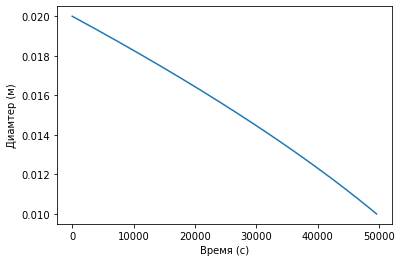

In [175]:
t1,d1, m1, i1 = runge(d, t, m, h)
plt.plot(t1[0:i], d1[0:i])
plt.xlabel("Время (с)")
plt.ylabel("Диамтер (м)")
plt.show()

Строим графиескую зависимость диаметра шарика от время таяния

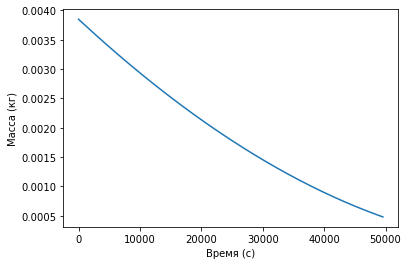

In [176]:
plt.plot(t1[0:i], m1[0:i])
plt.xlabel("Время (с)")
plt.ylabel("Масса (кг)")
plt.show()

Кроме того были получены следующие рассчетные данные:
- Динамическая вязкость
- Коэффициент, характеризующий удельную скорость испарения
- Графическое представление числа Шервуда по времени

Динамическая вязкость = 1.8048522515702985e-05
Коэффициент, характеризующий удельную скорость испарения = -0.004729583631764885


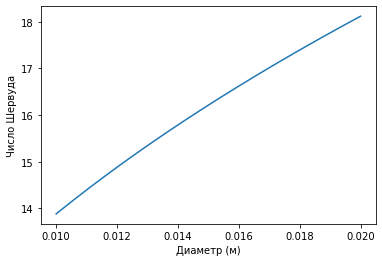

In [177]:
print('Динамическая вязкость =',MUsmes)
print('Коэффициент, характеризующий удельную скорость испарения =',F)
Sh = 1+((1+(d[0:i]/C7))**(1/3))*((d[0:i]/C7)**0.077)
plt.plot(d[0:i], Sh[0:i])
plt.xlabel("Диаметр (м)")
plt.ylabel("Число Шервуда")
plt.show()

#### Оценим точность вычисления ДУ методом Рунге-Кутта 4-го порядка

In [178]:
t2,d2, m2, i2 = runge(d, t, m, h/2)
p=(d1[i1]-d2[i2])/15
print("Погрешность =", p)

Погрешность = 0.0003673486926709094
